# KMN K najbliższych sąsiadów

In [1]:
import random
import pandas as pd
import numpy as np
from scipy.spatial import KDTree
from sklearn.metrics import mean_absolute_error, log_loss, accuracy_score, balanced_accuracy_score
import random
import matplotlib.pyplot as plt

In [2]:
!wget https://raw.githubusercontent.com/betacord/ML/master/lab1/data/data.csv

--2023-04-06 09:02:03--  https://raw.githubusercontent.com/betacord/ML/master/lab1/data/data.csv
Translacja raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Łączenie się z raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... połączono.
Żądanie HTTP wysłano, oczekiwanie na odpowiedź... 200 OK
Długość: 7381541 (7,0M) [text/plain]
Zapis do: `data.csv.8'

data.csv.8          100%[===================>]   7,04M  7,46MB/s     w 0,9s    

2023-04-06 09:02:05 (7,46 MB/s) - zapisano `data.csv.8' [7381541/7381541]



In [3]:
houses = pd.read_csv('data.csv')
houses.head(3)

,AppraisedValue,SqFtLot,WaterSystem,SewerSystem,Access,Topography,StreetSurface,RestrictiveSzShape,InadequateParking,PcntUnusable,...,NativeGrowthProtEsmt,Easements,OtherDesignation,DeedRestrictions,DevelopmentRightsPurch,WaterProblems,TranspConcurrency,OtherProblems,lat,long
0,619000.0,6542712,1,1,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,47.354019,-122.225166
1,708000.0,105850,2,1,3,0,2,0,0,0,...,0,0,0,0,0,0,0,0,47.611248,-122.053154
2,297000.0,1667,2,2,4,0,1,0,2,0,...,0,0,0,0,0,0,0,0,47.701248,-122.365784


In [4]:
houses

,AppraisedValue,SqFtLot,WaterSystem,SewerSystem,Access,Topography,StreetSurface,RestrictiveSzShape,InadequateParking,PcntUnusable,...,NativeGrowthProtEsmt,Easements,OtherDesignation,DeedRestrictions,DevelopmentRightsPurch,WaterProblems,TranspConcurrency,OtherProblems,lat,long
0,619000.0,6542712,1,1,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,47.354019,-122.225166
1,708000.0,105850,2,1,3,0,2,0,0,0,...,0,0,0,0,0,0,0,0,47.611248,-122.053154
2,297000.0,1667,2,2,4,0,1,0,2,0,...,0,0,0,0,0,0,0,0,47.701248,-122.365784
3,523000.0,1872,2,2,4,0,1,0,2,0,...,0,0,0,0,0,0,0,0,47.537918,-122.392845
4,288000.0,3480,2,2,4,0,1,0,0,0,...,0,0,0,0,0,0,0,0,47.510227,-122.182167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52415,523000.0,6982,2,2,4,0,1,0,0,0,...,0,0,0,0,0,0,0,0,47.769810,-122.367447
52416,425000.0,5481,2,2,4,0,1,0,2,0,...,0,0,0,0,0,0,0,0,47.510895,-122.366936
52417,377000.0,6793,2,2,3,0,1,0,0,0,...,0,0,0,0,0,0,0,0,47.766289,-122.358192
52418,581000.0,7200,2,2,4,0,1,0,0,0,...,0,0,0,0,0,0,0,0,47.769989,-122.364822


In [5]:
houses.columns

Index(['AppraisedValue', 'SqFtLot', 'WaterSystem', 'SewerSystem', 'Access',
       'Topography', 'StreetSurface', 'RestrictiveSzShape',
       'InadequateParking', 'PcntUnusable', 'MtRainier', 'Olympics',
       'Cascades', 'Territorial', 'SeattleSkyline', 'PugetSound',
       'LakeWashington', 'LakeSammamish', 'SmallLakeRiverCreek', 'OtherView',
       'WfntLocation', 'WfntFootage', 'WfntBank', 'WfntPoorQuality',
       'WfntRestrictedAccess', 'WfntAccessRights', 'WfntProximityInfluence',
       'TidelandShoreland', 'LotDepthFactor', 'TrafficNoise', 'PowerLines',
       'OtherNuisances', 'NbrBldgSites', 'Contamination',
       'AdjacentGolfFairway', 'AdjacentGreenbelt', 'HistoricSite',
       'CurrentUseDesignation', 'NativeGrowthProtEsmt', 'Easements',
       'OtherDesignation', 'DeedRestrictions', 'DevelopmentRightsPurch',
       'WaterProblems', 'TranspConcurrency', 'OtherProblems', 'lat', 'long'],
      dtype='object')

In [6]:
houses.columns.values

array(['AppraisedValue', 'SqFtLot', 'WaterSystem', 'SewerSystem',
       'Access', 'Topography', 'StreetSurface', 'RestrictiveSzShape',
       'InadequateParking', 'PcntUnusable', 'MtRainier', 'Olympics',
       'Cascades', 'Territorial', 'SeattleSkyline', 'PugetSound',
       'LakeWashington', 'LakeSammamish', 'SmallLakeRiverCreek',
       'OtherView', 'WfntLocation', 'WfntFootage', 'WfntBank',
       'WfntPoorQuality', 'WfntRestrictedAccess', 'WfntAccessRights',
       'WfntProximityInfluence', 'TidelandShoreland', 'LotDepthFactor',
       'TrafficNoise', 'PowerLines', 'OtherNuisances', 'NbrBldgSites',
       'Contamination', 'AdjacentGolfFairway', 'AdjacentGreenbelt',
       'HistoricSite', 'CurrentUseDesignation', 'NativeGrowthProtEsmt',
       'Easements', 'OtherDesignation', 'DeedRestrictions',
       'DevelopmentRightsPurch', 'WaterProblems', 'TranspConcurrency',
       'OtherProblems', 'lat', 'long'], dtype=object)

### Wybór atrybutów
Wyscie : AppraisedValue
Wesscie
SqFtLot
lat
long


In [7]:
values = houses['AppraisedValue']

In [8]:
houses.drop('AppraisedValue',1, inplace=True)

/tmp/ipykernel_7966/1526003396.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  houses.drop('AppraisedValue',1, inplace=True)


 Normalizacja

In [9]:
houses = (houses - houses.mean())/(houses.max()-houses.min())

In [10]:
houses = houses[['SqFtLot','lat','long']]

In [11]:
houses

,SqFtLot,lat,long
0,0.926695,-0.002260,-0.002427
1,0.012250,0.004289,-0.001374
2,-0.002550,0.006580,-0.003288
3,-0.002521,0.002422,-0.003454
4,-0.002293,0.001717,-0.002164
...,...,...,...
52415,-0.001795,0.008325,-0.003298
52416,-0.002008,0.001734,-0.003295
52417,-0.001822,0.008236,-0.003241
52418,-0.001764,0.008330,-0.003282


### Podział danych
trening 80% test 20%

In [12]:
test_rows = random.sample(houses.index.tolist(), int(round(len(houses)*.2)))
train_rows=set(range(len(houses))) - set(test_rows)

In [13]:
df_test = houses.loc[test_rows]
df_train = houses.loc[train_rows]

test_values = values.loc[test_rows]
train_values = values.loc[train_rows]

/tmp/ipykernel_7966/3802386928.py:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_train = houses.loc[train_rows]
/tmp/ipykernel_7966/3802386928.py:5: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  train_values = values.loc[train_rows]


In [14]:
print(type(test_values))

<class 'pandas.core.series.Series'>


### KNN implementacja manualna

In [15]:
kdtree = KDTree(houses)

Funkcja przydzielająca predykcję

In [16]:
def predict(query_point, k):
    ''' k liczba sąsiadów'''
    _, idx = kdtree.query(query_point, k)
    return np.mean(values.iloc[idx])

In [17]:
train_predicted_values = []
train_actual_values = []

In [18]:
for _id, row in df_train.iterrows():
  prediction = predict(row, 5)
  train_predicted_values.append(prediction)
  train_actual_values.append(train_values[_id])

### Wyznaczanie błędu regresji

Za pomocą MAE

In [19]:
mae = mean_absolute_error(train_actual_values, train_predicted_values)

In [20]:
f'Sredni blad bezwzgledny dla danych testowych wynosi: {mae}'

'Sredni blad bezwzgledny dla danych testowych wynosi: 59434.90024322777'

### Zad1. 
    Wykorzystać powyższy przykład w celu znalezienia takiej wartości K, dla której wartość średniego błędu bezwzględnego na systemie treningowym

będzie najmniejsza. W tym celu należy stworzyć wykres liniowy, na którym oś x będzie przedstawiała wartość K, a oś y będzie przedstawiała wartość funkcji błędu. Następnie dla "najlepszej" wartości K sprawdzić wartość funkcji błędu na systemie testowym.

### Ilosc sąsiadow i błąd

In [22]:
number_neigbours = []
absolute_error = []
for i in range(3,20):
    number_neigbours.append(i)
    for _id, row in df_train.iterrows():
        prediction = predict(row, i)
        train_predicted_values.append(prediction)
        train_actual_values.append(train_values[_id])
    mae = mean_absolute_error(train_actual_values, train_predicted_values)
    absolute_error.append(mae)

    

In [23]:
print(len(number_neigbours),  absolute_error)

17 [61931.74318758765, 61557.67237051282, 61416.53229848488, 61422.683247522706, 61523.20787855315, 61681.15899391096, 61884.615606069456, 62113.5771870261, 62360.56383102033, 62616.33367835218, 62876.4960298165, 63134.893636498986, 63393.47430224805, 63650.74573484727, 63905.89481585447, 64157.290880332104, 64405.48462830949]


## Wykres

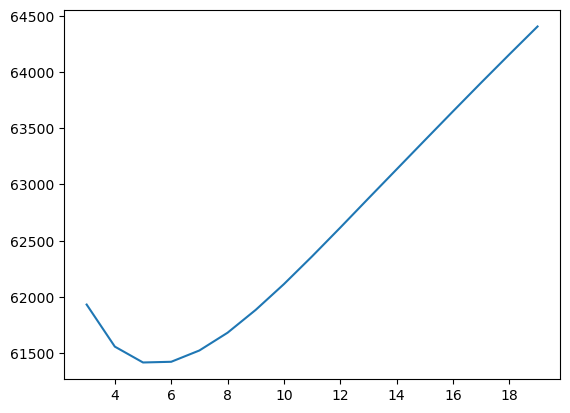

In [24]:
fig, ax = plt.subplots()
ax.plot(number_neigbours, absolute_error)

plt.show()

najmniejszy  blad

In [25]:
min_error = np.min(absolute_error)

In [26]:
min_error

61416.53229848488

#### Ilość sąsiadów

In [27]:
num_neighbour = [i for i, j in enumerate(absolute_error) if j == min_error]
number_neigbours[num_neighbour[0]]

5

### Zad2. Znaleźć "najlepszą" wartość K dla następujących podziałów na system treningowy i testowy:

    60% system treningowy i 40% system testowy
    65% system treningowy i 35% system testowy
    70% system treningowy i 30% system testowy
    75% system treningowy i 25% system testowy


Funkcja Podzial danych 

In [28]:
def split_data_test(percent_test):
    test_rows = set(random.sample(houses.index.tolist(), int(round(len(houses)* percent_test/100))))   
    return test_rows

/tmp/ipykernel_7966/739514232.py:5: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_test = houses.loc[test_rows]
/tmp/ipykernel_7966/739514232.py:6: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_train = houses.loc[train_rows]
/tmp/ipykernel_7966/739514232.py:7: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  test_values = values.loc[test_rows]
/tmp/ipykernel_7966/739514232.py:8: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  train_values = values.loc[train_rows]


7


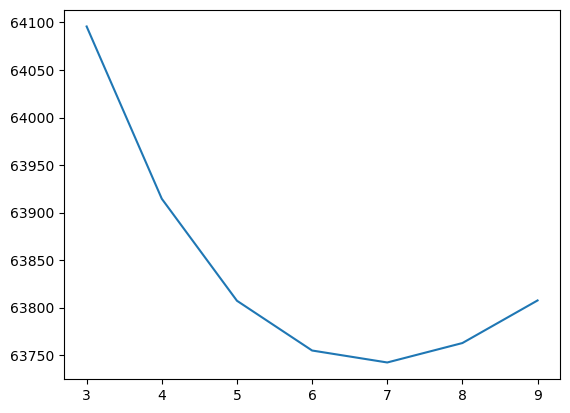

/tmp/ipykernel_7966/739514232.py:5: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_test = houses.loc[test_rows]
/tmp/ipykernel_7966/739514232.py:6: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_train = houses.loc[train_rows]
/tmp/ipykernel_7966/739514232.py:7: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  test_values = values.loc[test_rows]
/tmp/ipykernel_7966/739514232.py:8: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  train_values = values.loc[train_rows]


7


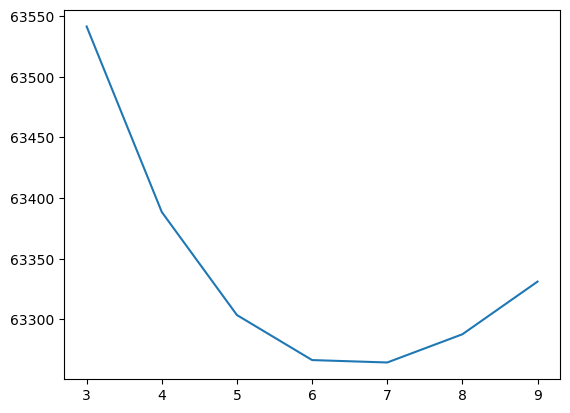

/tmp/ipykernel_7966/739514232.py:5: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_test = houses.loc[test_rows]
/tmp/ipykernel_7966/739514232.py:6: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_train = houses.loc[train_rows]
/tmp/ipykernel_7966/739514232.py:7: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  test_values = values.loc[test_rows]
/tmp/ipykernel_7966/739514232.py:8: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  train_values = values.loc[train_rows]


6


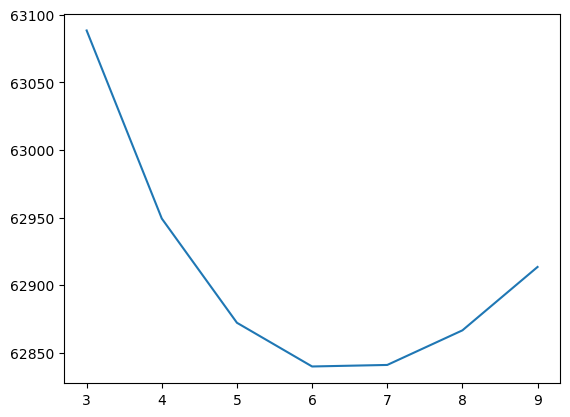

/tmp/ipykernel_7966/739514232.py:5: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_test = houses.loc[test_rows]
/tmp/ipykernel_7966/739514232.py:6: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_train = houses.loc[train_rows]
/tmp/ipykernel_7966/739514232.py:7: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  test_values = values.loc[test_rows]
/tmp/ipykernel_7966/739514232.py:8: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  train_values = values.loc[train_rows]


6


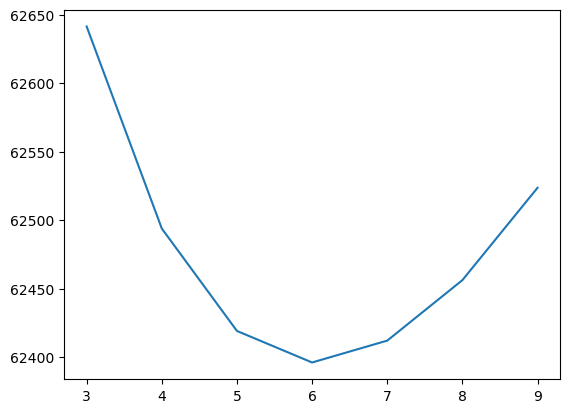

In [29]:
list_percents_test = [40, 35, 30, 5]
for percent in list_percents_test:
    test_rows = split_data_test(percent)
    train_rows = set(range(len(houses))) - test_rows
    df_test = houses.loc[test_rows]
    df_train = houses.loc[train_rows]
    test_values = values.loc[test_rows]
    train_values = values.loc[train_rows]
    number_neigbours = []
    absolute_error = []
    for i in range(3,10):
        number_neigbours.append(i)
        for _id, row in df_train.iterrows():
            prediction = predict(row, i)
            #try:
            train_predicted_values.append(prediction)
            train_actual_values.append(train_values[_id])
            #except:
             #   import pdb
              #  pdb.set_trace()
        mae = mean_absolute_error(train_actual_values, train_predicted_values)
        absolute_error.append(mae)
    min_error = np.min(absolute_error)
    num_neighbour = [i for i, j in enumerate(absolute_error) if j == min_error]
    print(number_neigbours[num_neighbour[0]])
    fig, ax = plt.subplots()
    ax.plot(number_neigbours, absolute_error)
    plt.show()
   


# Klasyfikacja KNN przy użyciu pakietu Scikit learn

## Wczytanie danych


In [5]:
houses = pd.read_csv('data.csv')

### Przygotowanie systemu decyzyjnego do klasyfikacji

In [6]:
houses

,AppraisedValue,SqFtLot,WaterSystem,SewerSystem,Access,Topography,StreetSurface,RestrictiveSzShape,InadequateParking,PcntUnusable,...,NativeGrowthProtEsmt,Easements,OtherDesignation,DeedRestrictions,DevelopmentRightsPurch,WaterProblems,TranspConcurrency,OtherProblems,lat,long
0,619000.0,6542712,1,1,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,47.354019,-122.225166
1,708000.0,105850,2,1,3,0,2,0,0,0,...,0,0,0,0,0,0,0,0,47.611248,-122.053154
2,297000.0,1667,2,2,4,0,1,0,2,0,...,0,0,0,0,0,0,0,0,47.701248,-122.365784
3,523000.0,1872,2,2,4,0,1,0,2,0,...,0,0,0,0,0,0,0,0,47.537918,-122.392845
4,288000.0,3480,2,2,4,0,1,0,0,0,...,0,0,0,0,0,0,0,0,47.510227,-122.182167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52415,523000.0,6982,2,2,4,0,1,0,0,0,...,0,0,0,0,0,0,0,0,47.769810,-122.367447
52416,425000.0,5481,2,2,4,0,1,0,2,0,...,0,0,0,0,0,0,0,0,47.510895,-122.366936
52417,377000.0,6793,2,2,3,0,1,0,0,0,...,0,0,0,0,0,0,0,0,47.766289,-122.358192
52418,581000.0,7200,2,2,4,0,1,0,0,0,...,0,0,0,0,0,0,0,0,47.769989,-122.364822


##### Zbadamy atrybut WaterSystem jako atrybut decyzyjny

In [7]:
houses['WaterSystem'].value_counts()

2    50448
1     1947
0       20
3        3
4        2
Name: WaterSystem, dtype: int64

#### Podział na atrybuty wejściowe (X) i decyzyjny (y) oraz na system treningowy i testowy w stosunku 80%:20%

In [8]:
houses=houses.query('WaterSystem in [1,2]').reset_index()

In [9]:
values = houses['WaterSystem']
houses.drop('WaterSystem',1, inplace=True)


/tmp/ipykernel_16162/3670161529.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  houses.drop('WaterSystem',1, inplace=True)


In [10]:
houses

,index,AppraisedValue,SqFtLot,SewerSystem,Access,Topography,StreetSurface,RestrictiveSzShape,InadequateParking,PcntUnusable,...,NativeGrowthProtEsmt,Easements,OtherDesignation,DeedRestrictions,DevelopmentRightsPurch,WaterProblems,TranspConcurrency,OtherProblems,lat,long
0,0,619000.0,6542712,1,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,47.354019,-122.225166
1,1,708000.0,105850,1,3,0,2,0,0,0,...,0,0,0,0,0,0,0,0,47.611248,-122.053154
2,2,297000.0,1667,2,4,0,1,0,2,0,...,0,0,0,0,0,0,0,0,47.701248,-122.365784
3,3,523000.0,1872,2,4,0,1,0,2,0,...,0,0,0,0,0,0,0,0,47.537918,-122.392845
4,4,288000.0,3480,2,4,0,1,0,0,0,...,0,0,0,0,0,0,0,0,47.510227,-122.182167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52390,52415,523000.0,6982,2,4,0,1,0,0,0,...,0,0,0,0,0,0,0,0,47.769810,-122.367447
52391,52416,425000.0,5481,2,4,0,1,0,2,0,...,0,0,0,0,0,0,0,0,47.510895,-122.366936
52392,52417,377000.0,6793,2,3,0,1,0,0,0,...,0,0,0,0,0,0,0,0,47.766289,-122.358192
52393,52418,581000.0,7200,2,4,0,1,0,0,0,...,0,0,0,0,0,0,0,0,47.769989,-122.364822


Normalizacja

In [11]:
houses = (houses - houses.mean())/(houses.max()-houses.min())

In [12]:
houses = houses[['SqFtLot','lat','long','AppraisedValue']]

In [15]:
values

0        1
1        2
2        2
3        2
4        2
        ..
52390    2
52391    2
52392    2
52393    2
52394    2
Name: WaterSystem, Length: 52395, dtype: int64

In [14]:
houses

,SqFtLot,lat,long,AppraisedValue
0,0.926699,-0.002262,-0.002422,0.214285
1,0.012254,0.004287,-0.001369,0.304303
2,-0.002547,0.006578,-0.003283,-0.111395
3,-0.002518,0.002420,-0.003449,0.117188
4,-0.002289,0.001715,-0.002159,-0.120498
...,...,...,...,...
52390,-0.001792,0.008323,-0.003293,0.117188
52391,-0.002005,0.001732,-0.003290,0.018068
52392,-0.001819,0.008234,-0.003237,-0.030480
52393,-0.001761,0.008328,-0.003277,0.175851


Podział na dane treningowe i testowe

In [16]:
test_rows = random.sample(houses.index.tolist(), int(round(len(houses)*.2)))
train_rows=set(range(len(houses))) - set(test_rows)

In [17]:
df_test = houses.loc[test_rows]
df_train = houses.loc[train_rows]

test_values = values.loc[test_rows]
train_values = values.loc[train_rows]

/tmp/ipykernel_16162/3802386928.py:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_train = houses.loc[train_rows]
/tmp/ipykernel_16162/3802386928.py:5: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  train_values = values.loc[train_rows]


In [19]:
train_rows

{0,
 1,
 2,
 3,
 6,
 7,
 8,
 9,
 11,
 12,
 13,
 14,
 16,
 17,
 18,
 19,
 20,
 21,
 23,
 24,
 25,
 27,
 28,
 31,
 32,
 33,
 34,
 35,
 39,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 61,
 62,
 63,
 65,
 66,
 67,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 80,
 81,
 82,
 83,
 84,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 95,
 96,
 98,
 100,
 101,
 102,
 105,
 106,
 107,
 108,
 109,
 111,
 113,
 114,
 115,
 116,
 117,
 118,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 131,
 132,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 144,
 145,
 146,
 147,
 148,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 164,
 165,
 166,
 167,
 168,
 170,
 171,
 174,
 175,
 176,
 179,
 180,
 182,
 183,
 184,
 186,
 188,
 190,
 191,
 193,
 194,
 195,
 196,
 197,
 198,
 200,
 201,
 203,
 204,
 205,
 206,
 207,
 208,
 209,
 210,
 211,
 212,
 213,
 215,
 216,
 218,
 220,
 221,
 222,
 224,
 225,
 226,
 227,
 228,
 230,
 231,
 232,
 233,
 2

In [128]:
df_train

,Age,Gender,Country,LSD
0,0,0,0,0
1,0,0,0,2
4,0,0,0,0
5,2,0,0,0
7,0,0,0,0
...,...,...,...,...
1877,0,0,0,0
1879,0,0,0,5
1881,0,0,0,5
1882,0,0,0,2


### KNN implementacja manualna

In [159]:
kdtree = KDTree(houses)

Funkcja przydzielająca decyzję

In [160]:
def classify(query_point, k):
    _, idx =kdtree.query(query_point, k)
    return np.argmax(np.bincount(values.iloc[idx]))

In [161]:
train_predicted_values = []
train_actual_values = []

In [162]:
for _id, row in df_train.iterrows():
  prediction = classify(row,7)
  train_predicted_values.append(prediction)
  train_actual_values.append(train_values[_id])

### Wyznaczanie błędu klasyfikacji
#### za pomocą entropii krzyżowej

In [163]:
ce = log_loss(train_actual_values, train_predicted_values)

In [164]:
ce

1.2838214380204962

### Wyznaczanie dokładności klasyfikacji

In [165]:
acc = balanced_accuracy_score(train_actual_values, train_predicted_values)

In [166]:
acc

0.7321749863751517

### Ilość sąsiadów i decyzja

In [167]:
number_neigbours = []
absolute_error = []
for i in range(2,5):
    number_neigbours.append(i)
    for _id, row in df_train.iterrows():
        decision = classify(row, i)
        train_predicted_values.append(decision)
        train_actual_values.append(train_values[_id])
    ce = log_loss(train_actual_values, train_predicted_values)
    absolute_error.append(ce)


In [168]:
absolute_error

[1.2838214380204964, 1.2838214380204964, 1.2838214380204964]

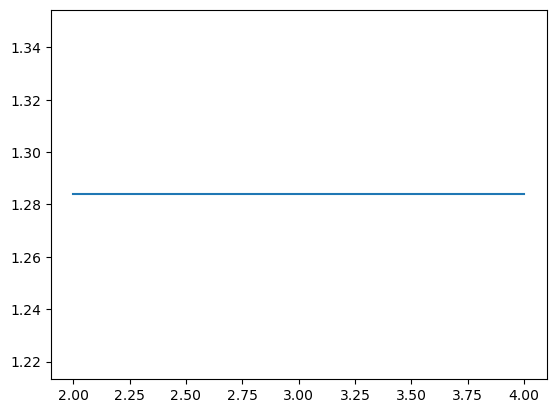

In [169]:
fig, ax = plt.subplots()
ax.plot(number_neigbours, absolute_error)

plt.show()